In [1]:
%matplotlib inline
import chgpath
from bayes import *

In [2]:
def get_die(sides):
    """return a die with the specified number of sides"""
    return Pmf(1.0, index=range(1,sides+1))

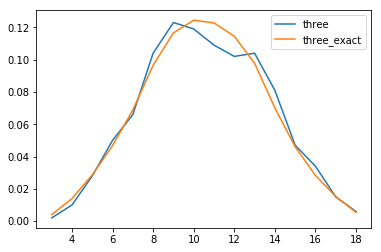

In [3]:
# create list of three six-sided dice
d6 = get_die(6)
dice = [d6] * 3

# simulation - distribution of three rolls
three = get_sample_sum_pmf(dice, 1000)
three.normalize()

# enumeration - distribution of three rolls
one = get_sample_sum_pmf([d6], 1000)
three_exact = one + one + one
three_exact.normalize()

three.plot(legend=True, label='three')
three_exact.plot(legend=True, label='three_exact')

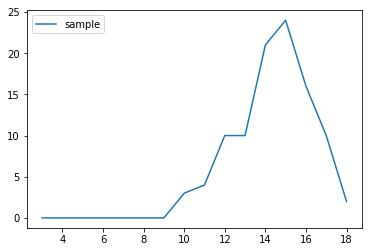

In [13]:
# simulation - distribution of best of three rolls
three_sample_max_pmf = get_sample_max_pmf(three_exact, 6)
three_sample_max_pmf.plot(legend=True, label='sample')

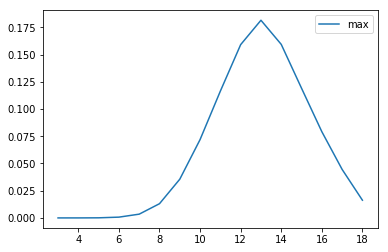

In [10]:
# enumeration - distribution of best of three rolls
three_max = max_pmf(max_pmf(three_exact, three_exact), three_exact)
three_max.plot(legend=True, label='max')

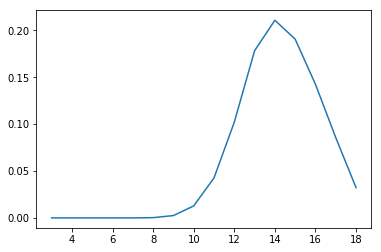

In [6]:
# exponentiation - distribution of best of three rolls
three_cdf = three_exact.to_cdf()
three_max_cdf = three_cdf.to_max_cdf(6)
three_max_pmf = three_max_cdf.to_pmf()
three_max_pmf.normalize()
three_max_pmf.plot()

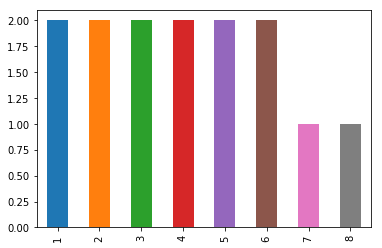

In [7]:
d8 = get_die(8)

# mixture of two dice - equal probability for each
meta_pmf = Pmf(1.0, index=get_index([d6,d8], 'object'))
mix = get_mix_pmf(meta_pmf)
mix.plot(kind='bar')

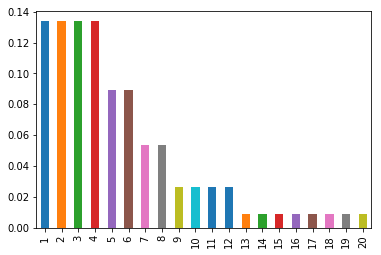

In [8]:
# mixture of five dice - varying probabilities for each
sides = [4,6,8,12,20]
dice = [get_die(i) for i in sides]
dice_probs = [5,4,3,2,1]
meta_pmf = Pmf(dice_probs, index=get_index(dice, 'object'))
mix = get_mix_pmf(meta_pmf)
mix.normalize()
mix.plot(kind='bar')